# Introduction to Bootstrapping - Simulation Methods

Bootstrapping 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from sklearn.tree import DecisionTreeClassifier
from math import floor

print(A)

ModuleNotFoundError: No module named 'visualization'

Install required dependencies

In [3]:
import pandas as pd

url = "https://gist.githubusercontent.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04/raw/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


From this, we can see that there are factors which may matter for inference, and there are others which may have less impact. Let's say for the purpose of this presentation, we want to check if age and bmi are causal factors leading to strokes.

Let's clean the data first. 

In [4]:
df = df[['age', 'bmi', 'stroke']].dropna() 


How should we base our visualization?

In [5]:
mu = df['bmi'].mean()
sig = df['bmi'].std()

print(f"The bmi distribution has a mean of {mu:.3f} and a standard deviation of {sig:.3f}")

min = mu - sig *.25
max = floor(min)
max = mu + sig *.25
max = floor(max)





The bmi distribution has a mean of 28.893 and a standard deviation of 7.854


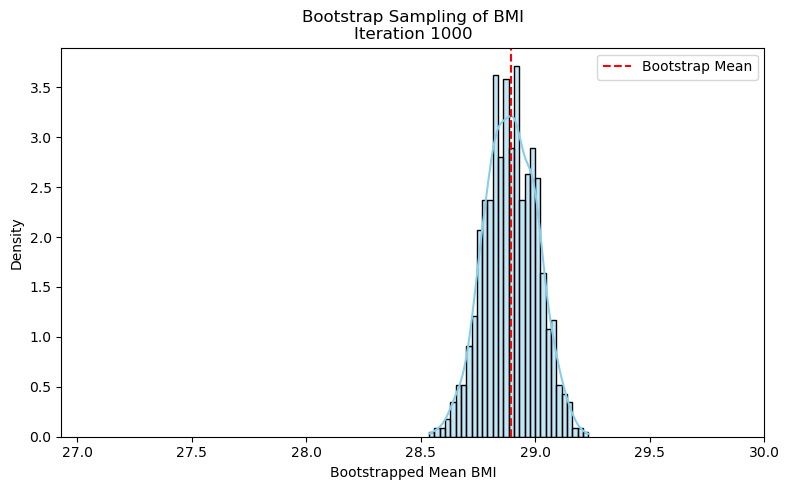

In [ ]:
bootstrap_stats = []  # Store bootstrapped means
n_bootstraps = 1000

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(bootstrap_stats, bins=30, stat='density', color='skyblue', kde=True, ax=ax)
text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# 4. Animation update function
def update(frame):
    ax.clear()
    sample = np.random.choice(df['bmi'], size=len(df), replace=True)
    boot_mean = np.mean(sample)
    bootstrap_stats.append(boot_mean)

    sns.histplot(bootstrap_stats, bins=30, stat='density', color='skyblue', kde=True, ax=ax)
    ax.axvline(np.mean(bootstrap_stats), color='red', linestyle='--', label='Bootstrap Mean')
    ax.set_title(f"Bootstrap Sampling of BMI\nIteration {frame + 1}")
    ax.set_xlabel("Bootstrapped Mean BMI")
    ax.set_ylabel("Density")
    ax.legend()
    ax.set_xlim(min, max)
    text.set_text(f"Iteration: {frame + 1}")

# 5. Create animation
ani = FuncAnimation(fig, update, frames=n_bootstraps, interval=1000, repeat=False)

ani.save("bootstrap_bmi.gif", writer="pillow")
plt.tight_layout()
plt.show()